# Exploratory Analysis of Cleaned Data Files
This notebook contains exploratory analysis of the cleaned data provided by the city prior to being used as a dashboard.

## 00: Load Libraries for Exploratory Analysis

In [84]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Utility Libraries
import os
import warnings
warnings.filterwarnings('ignore')

# Display Options
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
sns.set_style("whitegrid")

## 01: Load Cleaned Data
While this step is mostly self explanatory. The code below loads the cleaned data files for both expenditure status and program inventory. It is confirmed successful by loading the checked shapes and column names. 

In [66]:
# Define file path to cleaned outputs
data_path = "cleaned_outputs/"

# Load Files: Cleaned expenditure and program inventory files (CSV format)
df_expend = pd.read_csv(
    os.path.join(data_path, "cleaned_expenditure_status.csv")
)

df_programs = pd.read_csv(
    os.path.join(data_path, "cleaned_program_inventory.csv")
)

# Confirm successful load
print(f"📌 Expenditure Data Shape: {df_expend.shape}")
print(f"📌 Program Inventory Shape: {df_programs.shape}")

# Show column names
print("\n📌 Column Names in Expenditure Status:")
print(df_expend.columns.tolist())

print("\n📌 Column Names in Program Inventory:")
print(df_programs.columns.tolist())

📌 Expenditure Data Shape: (2258, 8)
📌 Program Inventory Shape: (378, 35)

📌 Column Names in Expenditure Status:
['adjusted_appropriation', 'fund_no', 'dept_no', 'activity_code', 'object_code', 'sub_object_code', 'account_description', 'department']

📌 Column Names in Program Inventory:
['fund', 'dept_no', 'activity', 'program_title_h8', 'requested_title_change_i9', 'department_h6', 'ftes_h36', 'personnel_g27', 'o&m_g28', 'debt_g29', 'grant_g30', 'transfers_g31', 'capital_g32', 'total_expenditures_g33', 'cost_recovery_e58_yn', 'cost_recovery_p24_percent', 'description_e12', 'additional_activities_e20', 'mandate_e41_yn', 'mandate_h41_entity', 'mandate_e43_descript', 'service_level_e47_yn', 'service_level_h47_entity', 'service_level_e49_descript', 'reliance_e53_level', 'reliance_e55_high_descript', 'strategic_goal_e64_yn', 'strategic_goal_e66_name', 'strategic_goal_e68_action_descript', 'strategic_goal_e74_additional_actions', 'strategic_goal_e80_2nd_additional_actions', 'trend_demand_e87

## 02: Data Overview
This next chunk of code provides a high-level overview of both datasets. Providing data types, missing values, and general structure. Now I can comprehend what I am working with!

In [69]:
# Overview of Expenditure Data
print("📌 Expenditure Status Overview:")
df_expend.info()
display(df_expend.describe(include='all'))

# Overview of Program Inventory Data
print("\n📌 Program Inventory Overview:")
df_programs.info()
display(df_programs.describe(include='all'))

# Count missing values
print("\n📌 Missing Values (Expenditure):")
print(df_expend.isnull().sum())

print("\n📌 Missing Values (Program Inventory):")
print(df_programs.isnull().sum())

📌 Expenditure Status Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   adjusted_appropriation  2258 non-null   float64
 1   fund_no                 2258 non-null   int64  
 2   dept_no                 2258 non-null   int64  
 3   activity_code           2258 non-null   int64  
 4   object_code             2258 non-null   int64  
 5   sub_object_code         2258 non-null   int64  
 6   account_description     2258 non-null   object 
 7   department              2258 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 141.3+ KB


,adjusted_appropriation,fund_no,dept_no,activity_code,object_code,sub_object_code,account_description,department
count,"2,258.00","2,258.00","2,258.00","2,258.00","2,258.00","2,258.00",2258,2258
unique,NaN,NaN,NaN,NaN,NaN,NaN,276,18
top,NaN,NaN,NaN,NaN,NaN,NaN,PROFESSIONAL SERVICES,Transfers
freq,NaN,NaN,NaN,NaN,NaN,NaN,148,852
mean,"149,906.04","2,898.44",319.82,"439,128.16",387.73,23.32,NaN,NaN
std,"796,863.98","2,047.50",60.27,"26,533.26",246.05,94.63,NaN,NaN
min,"-3,438.00","1,000.00",210.00,"410,000.00",110.00,0.00,NaN,NaN
25%,500.00,"1,000.00",280.00,"420,153.00",210.00,0.00,NaN,NaN
50%,"5,865.00","2,512.00",321.00,"430,510.00",344.00,0.00,NaN,NaN
75%,"58,828.25","4,081.00",370.00,"460,470.00",507.50,0.00,NaN,NaN



📌 Program Inventory Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   fund                                       378 non-null    int64  
 1   dept_no                                    378 non-null    int64  
 2   activity                                   378 non-null    int64  
 3   program_title_h8                           378 non-null    object 
 4   requested_title_change_i9                  378 non-null    object 
 5   department_h6                              378 non-null    object 
 6   ftes_h36                                   378 non-null    float64
 7   personnel_g27                              378 non-null    float64
 8   o&m_g28                                    378 non-null    float64
 9   debt_g29                                   378 non-null    int64  


,fund,dept_no,activity,program_title_h8,requested_title_change_i9,department_h6,ftes_h36,personnel_g27,o&m_g28,debt_g29,grant_g30,transfers_g31,capital_g32,total_expenditures_g33,cost_recovery_e58_yn,cost_recovery_p24_percent,description_e12,additional_activities_e20,mandate_e41_yn,mandate_h41_entity,mandate_e43_descript,service_level_e47_yn,service_level_h47_entity,service_level_e49_descript,reliance_e53_level,reliance_e55_high_descript,strategic_goal_e64_yn,strategic_goal_e66_name,strategic_goal_e68_action_descript,strategic_goal_e74_additional_actions,strategic_goal_e80_2nd_additional_actions,trend_demand_e87_level,trend_demand_e89_descript,risk_e93_type,risk_e95_descript
count,378.00,378.00,378.00,378,378,378,378.00,378.00,378.00,378.00,378.00,378.00,378.00,378.00,378,378.00,378,377,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378
unique,NaN,NaN,NaN,228,170,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,315,27,3,5,58,3,7,78,4,8,3,6,43,44,24,4,149,5,83
top,NaN,NaN,NaN,ADMINISTRATION,0,"Public Works, Mobility, & Infrastructure",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Bond Debt Service Requirements,0,No,0,0,No,0,0,Low,0,No,0,0,0,0,Demand for service is stable,0,Low/No Risk,0
freq,NaN,NaN,NaN,23,202,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,32,347,195,219,258,191,219,252,146,240,170,212,237,289,334,156,194,216,274
mean,"3,434.32",334.52,"452,651.93",NaN,NaN,NaN,3.10,"242,492.42","164,754.76","56,332.50","53,349.96","78,794.56","290,018.73","885,742.93",NaN,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,"2,248.89",55.99,"32,906.49",NaN,NaN,NaN,7.20,"970,882.44","711,732.70","433,851.17","244,531.10","542,123.09","1,702,489.55","2,251,029.73",NaN,4.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,"1,000.00",210.00,"410,100.00",NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,500.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,"1,216.00",290.00,"422,632.50",NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"60,197.50",NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,"2,869.00",340.00,"450,555.00",NaN,NaN,NaN,0.00,0.00,"2,500.00",0.00,0.00,0.00,0.00,"217,968.50",NaN,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,"5,289.50",385.00,"470,450.00",NaN,NaN,NaN,5.78,"73,294.75","63,847.12",0.00,0.00,0.00,0.00,"744,474.50",NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



📌 Missing Values (Expenditure):
adjusted_appropriation    0
fund_no                   0
dept_no                   0
activity_code             0
object_code               0
sub_object_code           0
account_description       0
department                0
dtype: int64

📌 Missing Values (Program Inventory):
fund                                         0
dept_no                                      0
activity                                     0
program_title_h8                             0
requested_title_change_i9                    0
department_h6                                0
ftes_h36                                     0
personnel_g27                                0
o&m_g28                                      0
debt_g29                                     0
grant_g30                                    0
transfers_g31                                0
capital_g32                                  0
total_expenditures_g33                       0
cost_recovery_e58_yn             

## 03: Summary Statistics
This next step provides high-level statistics like central tendency, range and variability across the numeric fields, including expenditures and FTEs. 

In [70]:
# Select numeric columns from program inventory
numeric_cols = ['ftes_h36', 'personnel_g27', 'o&m_g28', 'debt_g29', 'grant_g30',
                'transfers_g31', 'capital_g32', 'total_expenditures_g33', 'cost_recovery_p24_percent']

# Summary stats
print(" Summary Statistics (Program Inventory):")
display(df_programs[numeric_cols].describe())

print("\n Summary Statistics (Expenditure Status):")
display(df_expend.describe())

 Summary Statistics (Program Inventory):


,ftes_h36,personnel_g27,o&m_g28,debt_g29,grant_g30,transfers_g31,capital_g32,total_expenditures_g33,cost_recovery_p24_percent
count,378.00,378.00,378.00,378.00,378.00,378.00,378.00,378.00,378.00
mean,3.10,"242,492.42","164,754.76","56,332.50","53,349.96","78,794.56","290,018.73","885,742.93",0.86
std,7.20,"970,882.44","711,732.70","433,851.17","244,531.10","542,123.09","1,702,489.55","2,251,029.73",4.67
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,500.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"60,197.50",0.00
50%,0.00,0.00,"2,500.00",0.00,0.00,0.00,0.00,"217,968.50",0.20
75%,5.78,"73,294.75","63,847.12",0.00,0.00,0.00,0.00,"744,474.50",1.00
max,80.00,"14,355,807.00","9,181,206.00","7,884,727.00","2,653,633.00","8,112,803.00","24,755,342.00","25,695,398.00",71.71



 Summary Statistics (Expenditure Status):


,adjusted_appropriation,fund_no,dept_no,activity_code,object_code,sub_object_code
count,"2,258.00","2,258.00","2,258.00","2,258.00","2,258.00","2,258.00"
mean,"149,906.04","2,898.44",319.82,"439,128.16",387.73,23.32
std,"796,863.98","2,047.50",60.27,"26,533.26",246.05,94.63
min,"-3,438.00","1,000.00",210.00,"410,000.00",110.00,0.00
25%,500.00,"1,000.00",280.00,"420,153.00",210.00,0.00
50%,"5,865.00","2,512.00",321.00,"430,510.00",344.00,0.00
75%,"58,828.25","4,081.00",370.00,"460,470.00",507.50,0.00
max,"24,755,342.00","9,000.00",900.00,"521,010.00",940.00,734.00


## 04: Department-Level Budget Analysis
This next step aggregates expenditure and program data by department to surface spending trends and allocations at the org level. 

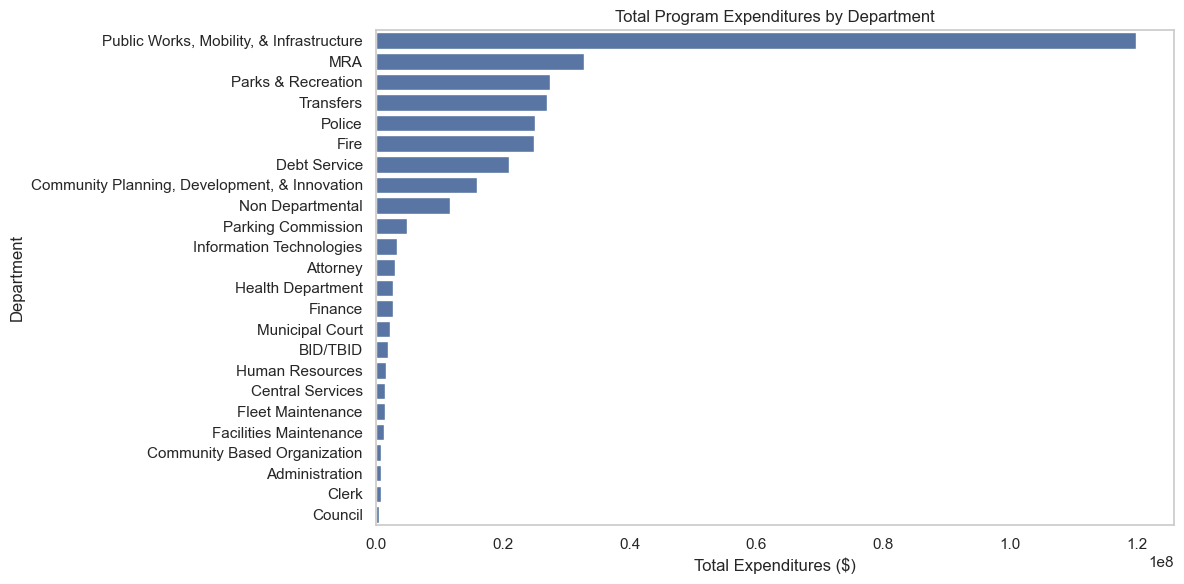

In [72]:
# Sum total expenditures per department
dept_summary = df_programs.groupby("department_h6")["total_expenditures_g33"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=dept_summary.values, y=dept_summary.index)
plt.title("Total Program Expenditures by Department")
plt.xlabel("Total Expenditures ($)")
plt.ylabel("Department")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

## 05: Program-Level Analysis
Next, I take a look at how resources are spread across city programs. This helps with clarifying which programs are highest-cost or possibly underfunded.

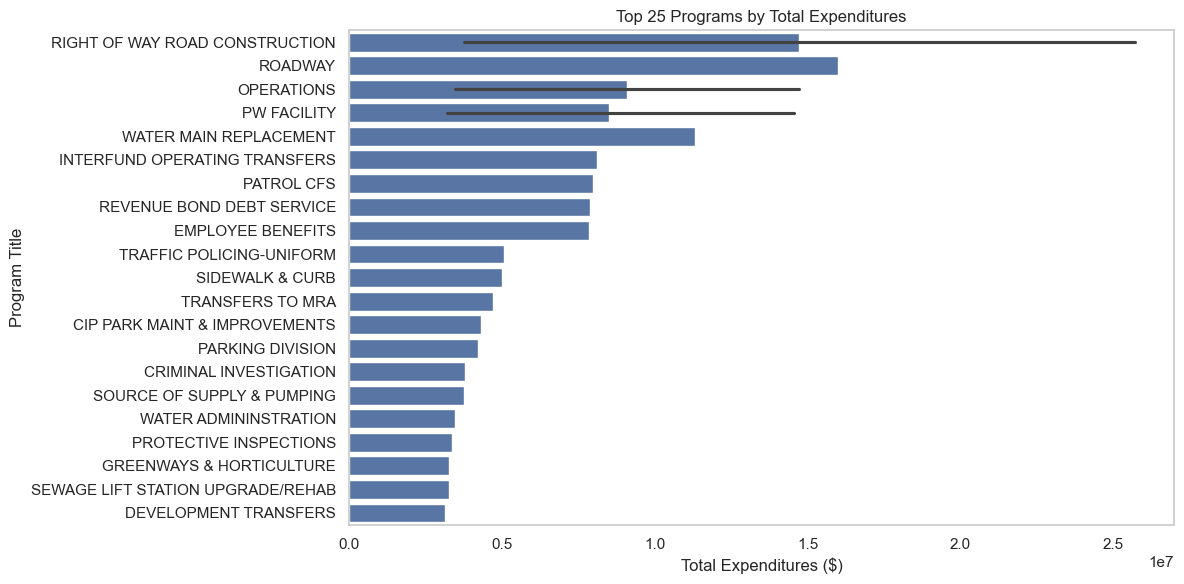

In [79]:
# Top 15 programs by total expenditure
top_programs = df_programs.sort_values("total_expenditures_g33", ascending=False).head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x="total_expenditures_g33", y="program_title_h8", data=top_programs)
plt.title("Top 25 Programs by Total Expenditures")
plt.xlabel("Total Expenditures ($)")
plt.ylabel("Program Title")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

## 06: Budget Allocation Breakdown by Type
This section of code visualizes how the city's budget is split across spending categories: personnel, o&m, captial, debt, grants, and so forth. 

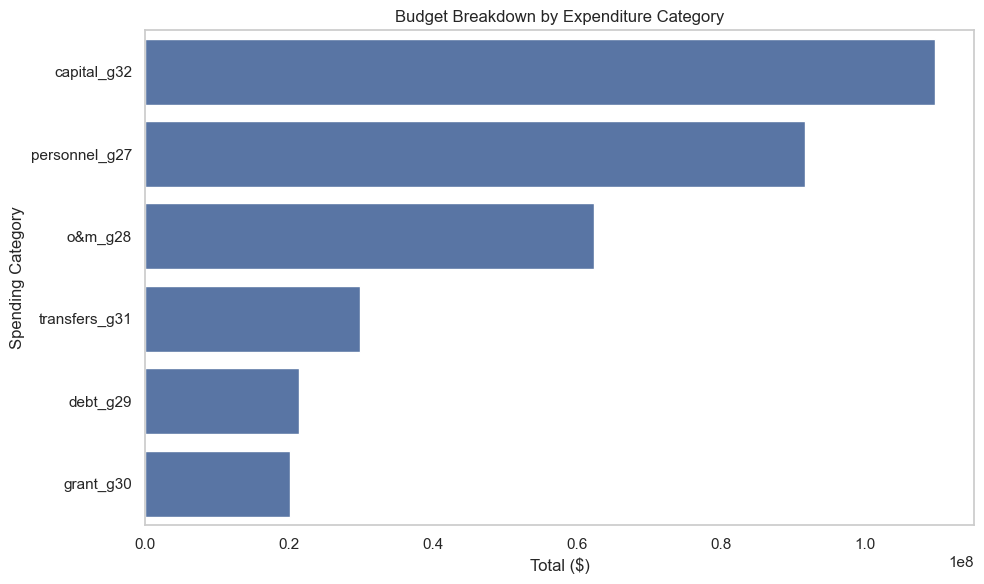

In [80]:
# Aggregate categories
spend_cats = ['personnel_g27', 'o&m_g28', 'debt_g29', 'grant_g30', 'transfers_g31', 'capital_g32']
budget_breakdown = df_programs[spend_cats].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=budget_breakdown.values, y=budget_breakdown.index)
plt.title("Budget Breakdown by Expenditure Category")
plt.xlabel("Total ($)")
plt.ylabel("Spending Category")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

## 07: Mandate, Risk and Trend Distributions
This next section provides program strategic sensitivity enlightenment. Now I can see how many legally required, facing risk or growing demand related programs there are.

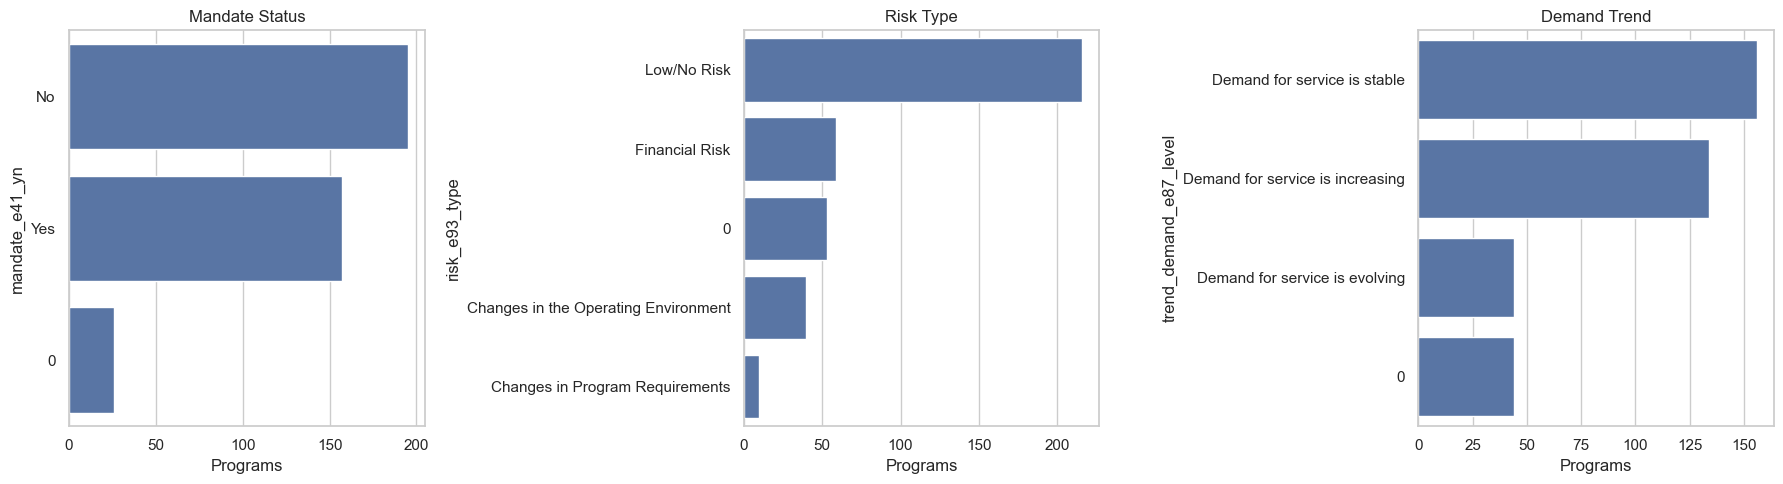

In [82]:
# Count values
mandate_counts = df_programs["mandate_e41_yn"].value_counts()
risk_counts = df_programs["risk_e93_type"].fillna("None").value_counts()
trend_counts = df_programs["trend_demand_e87_level"].fillna("Unknown").value_counts()

# Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=mandate_counts.values, y=mandate_counts.index, ax=axs[0])
axs[0].set_title("Mandate Status")
axs[0].set_xlabel("Programs")

sns.barplot(x=risk_counts.values, y=risk_counts.index, ax=axs[1])
axs[1].set_title("Risk Type")
axs[1].set_xlabel("Programs")

sns.barplot(x=trend_counts.values, y=trend_counts.index, ax=axs[2])
axs[2].set_title("Demand Trend")
axs[2].set_xlabel("Programs")

plt.tight_layout()
plt.show()

## 08: Missing Values Overview
This heatmpa provides a matrix view of the missing data (if any) and helps prioritize further clean up, and understand the exact limits of the analysis. 

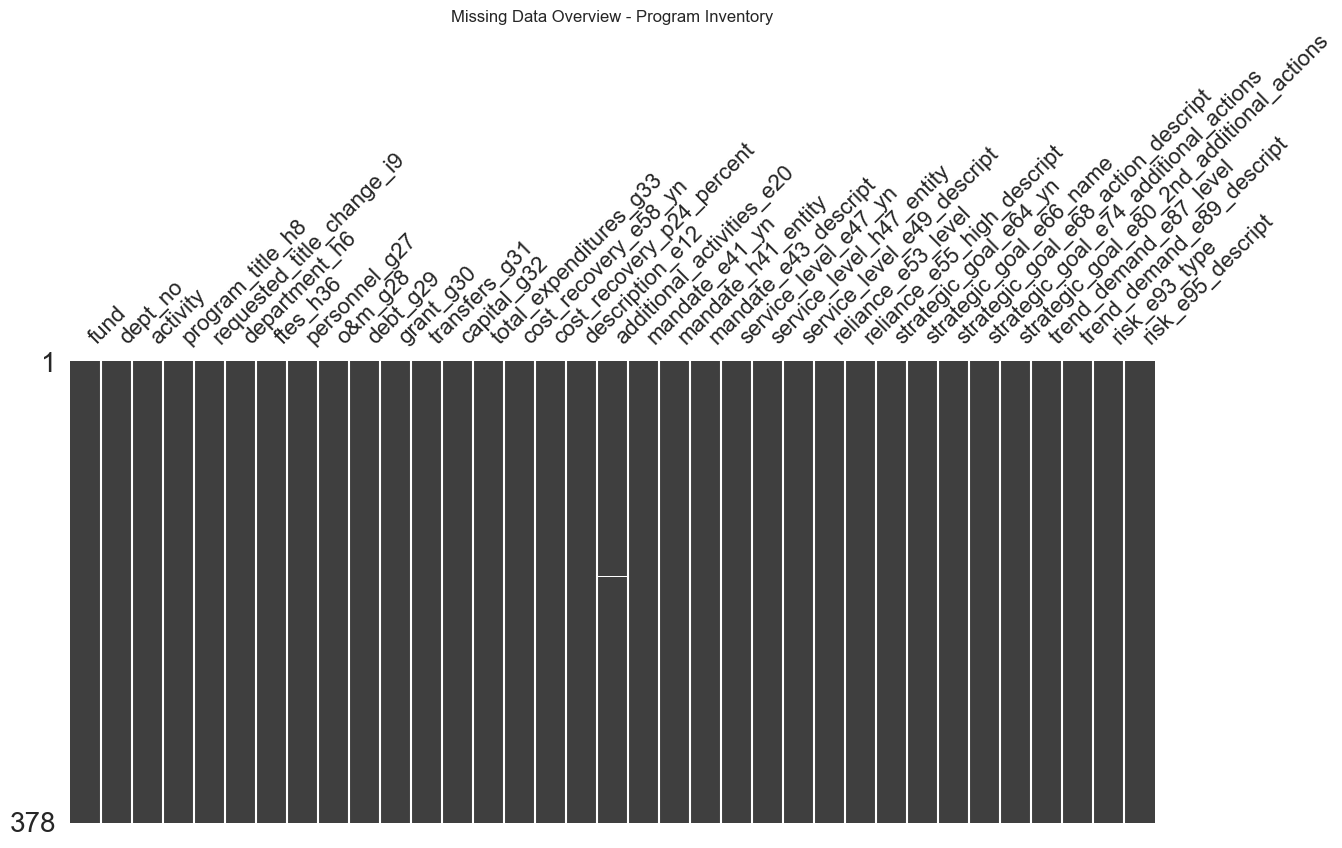

In [90]:
# Visualize missingness
msno.matrix(df_programs, figsize=(14, 6), sparkline=False)
plt.title("Missing Data Overview - Program Inventory")
plt.show()

## 09: FTE vs Total Spending
This scatterplot helps identify whether programs with more staff also tend to have higher budgets. I add a regression line to show some general trends. 

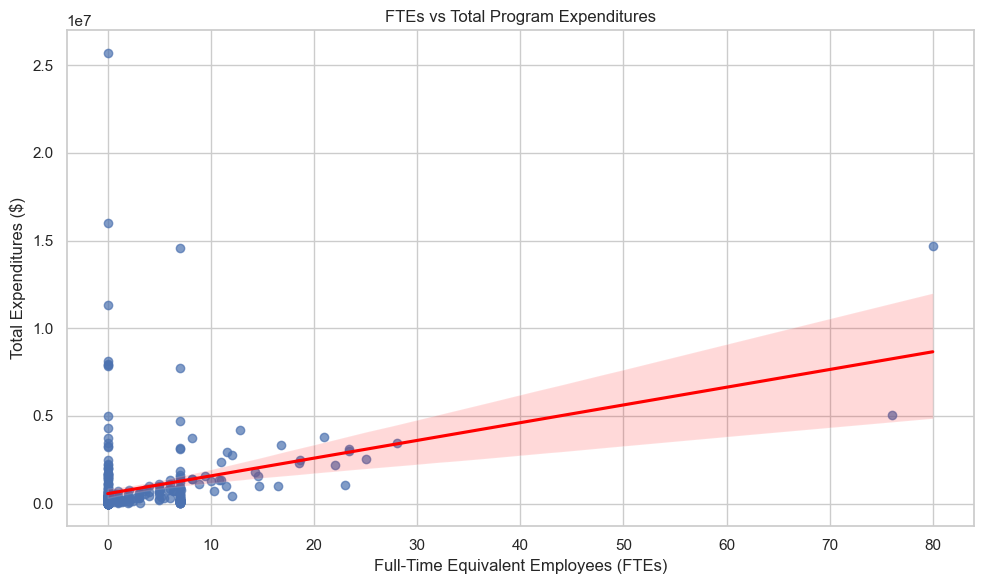

In [89]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_programs,
    x="ftes_h36", 
    y="total_expenditures_g33", 
    scatter_kws={"alpha": 0.7},
    line_kws={"color": "red"}
)
plt.title("FTEs vs Total Program Expenditures")
plt.xlabel("Full-Time Equivalent Employees (FTEs)")
plt.ylabel("Total Expenditures ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

## 10: Department-level Cost Recovery Overview
This visual represents how much of a department's programs are actually cost-recovered (or offset by revenu). This helps with identifying self-funded vs subsidized services. 

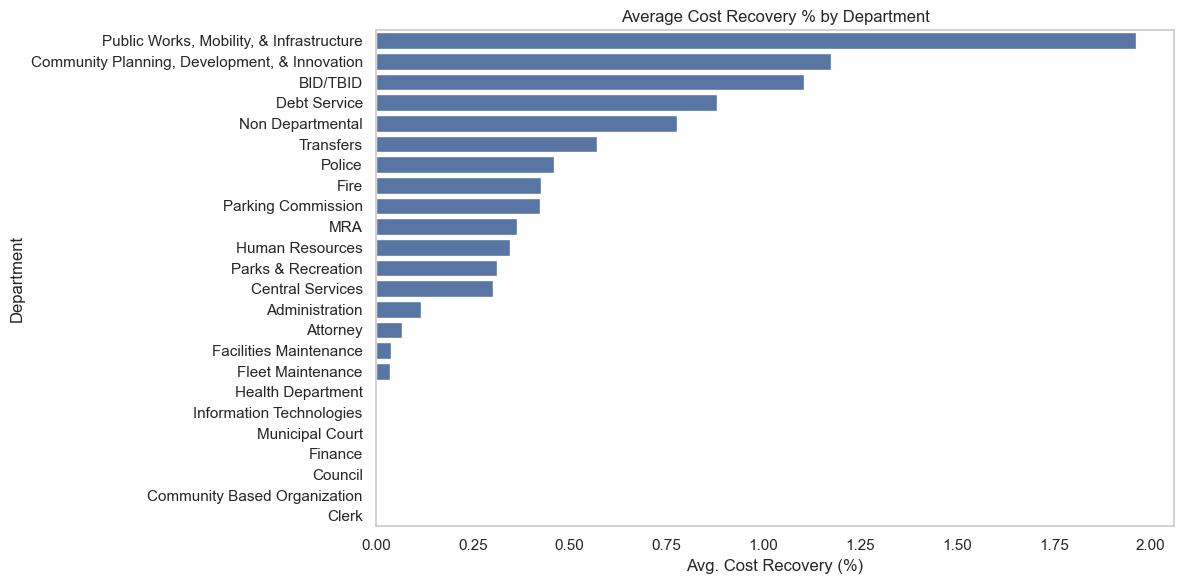

In [88]:
# Average cost recovery by department
dept_cost_recovery = df_programs.groupby("department_h6")["cost_recovery_p24_percent"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=dept_cost_recovery.values, y=dept_cost_recovery.index)
plt.title("Average Cost Recovery % by Department")
plt.xlabel("Avg. Cost Recovery (%)")
plt.ylabel("Department")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

## 11: Combined Risk + Mandate Matrix
This visual shocases risk and mandate to identify which programs are both risky and legally required. This basically represents the potentially high-priority quadrant. 

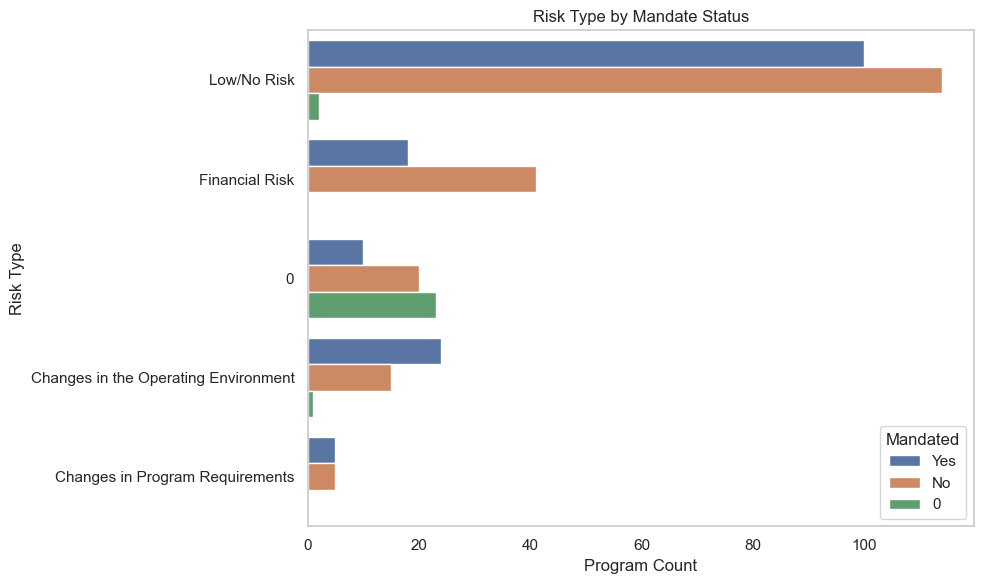

In [92]:
# Create a simplified matrix
risk_mandate = df_programs.copy()
risk_mandate["mandated"] = risk_mandate["mandate_e41_yn"].fillna("No")
risk_mandate["risk_type"] = risk_mandate["risk_e93_type"].fillna("None")

plt.figure(figsize=(10, 6))
sns.countplot(
    data=risk_mandate,
    y="risk_type",
    hue="mandated",
    order=risk_mandate["risk_type"].value_counts().index
)
plt.title("Risk Type by Mandate Status")
plt.xlabel("Program Count")
plt.ylabel("Risk Type")
plt.legend(title="Mandated")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

## 12: Department View of Risk and Trend Heatmap
This heatmap breaks down risk and trend levels across departments to help highlight vulnerable or growing services. 

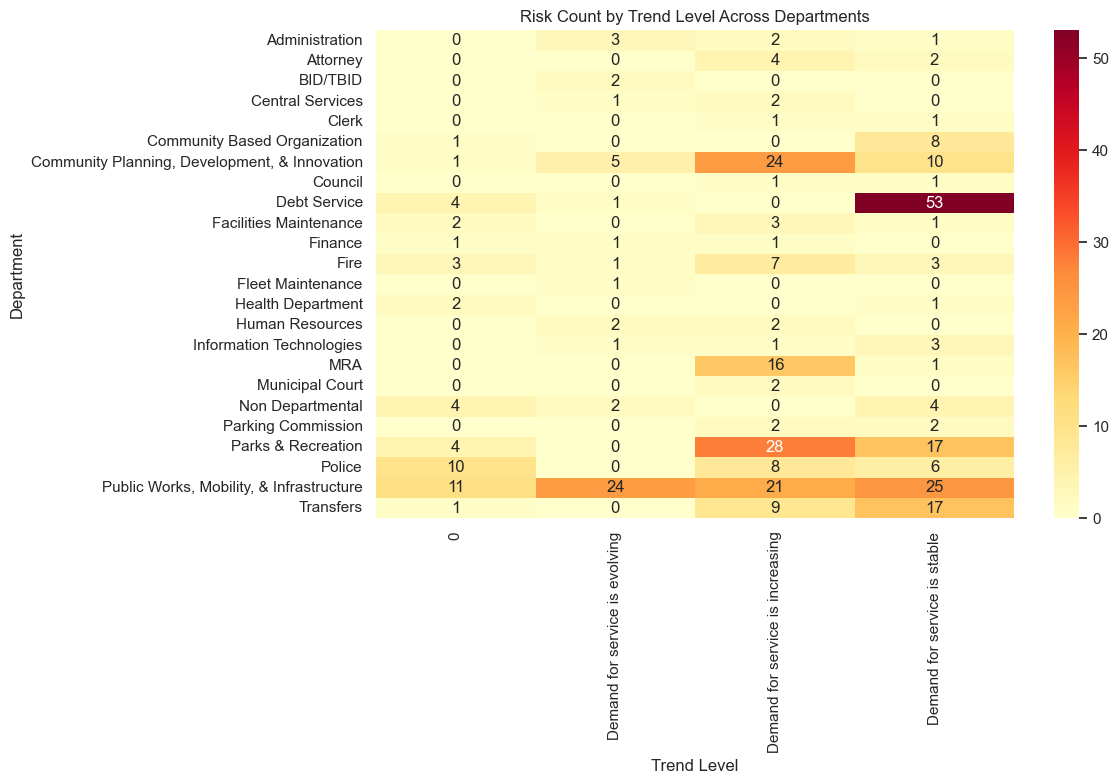

In [93]:
# Create pivot
heatmap_data = df_programs.pivot_table(
    index="department_h6",
    columns="trend_demand_e87_level",
    values="risk_e93_type",
    aggfunc="count",
    fill_value=0
)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Risk Count by Trend Level Across Departments")
plt.xlabel("Trend Level")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

## 13: Flagging High-Investment, High-Risk Programs
This identifies the programs with high budget AND are flagged for high risk. 

In [94]:
# Define thresholds
high_budget_thresh = df_programs["total_expenditures_g33"].quantile(0.75)
high_risk_programs = df_programs[
    (df_programs["total_expenditures_g33"] >= high_budget_thresh) &
    (df_programs["risk_e93_type"].notna())
]

# Display key columns
print("🚨 High-Investment + High-Risk Programs:")
display(high_risk_programs[["program_title_h8", "department_h6", "total_expenditures_g33", "risk_e93_type"]])

🚨 High-Investment + High-Risk Programs:


,program_title_h8,department_h6,total_expenditures_g33,risk_e93_type
8,ADMINISTRATION,Human Resources,"917,378.00",Low/No Risk
16,INFORMATION TECHNOLOGIES,Information Technologies,"2,364,196.00",Changes in Program Requirements
19,CITY/MUNICIPAL COURT,Municipal Court,"2,220,008.00",Changes in Program Requirements
22,FINANCIAL SERVICES ADMINISTRATION,Finance,"1,680,082.00",Low/No Risk
42,ADMINISTRATION,"Community Planning, Development, & Innovation","769,228.00",Low/No Risk
...,...,...,...,...
352,PUBLIC SAFETY OPERATING/LIGHT VEHICLES,"Public Works, Mobility, & Infrastructure","1,500,000.00",Low/No Risk
354,CIP STREET SWEEPER,"Public Works, Mobility, & Infrastructure","1,405,000.00",Low/No Risk
355,TRANSFER TO CIP,Transfers,"2,503,934.00",Low/No Risk
357,INTERFUND OPERATING TRANSFERS,Transfers,"8,112,803.00",Changes in the Operating Environment
